<a href="https://colab.research.google.com/github/ericbanzuzi/Thesis-DL-LC/blob/main/notebooks/R2Plus1D_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)
base = Path('/content/drive/MyDrive/thesis')  # working directory 

Mounted at /content/drive


Get the git repo to colab through a zip file to get faster performance

In [2]:
zip_path = base/'Thesis-DL-LC-main.zip'
!cp '{zip_path}' .
!unzip -q Thesis-DL-LC-main.zip
!rm Thesis-DL-LC-main.zip

In [3]:
%cd '/content/Thesis-DL-LC-main'

/content/Thesis-DL-LC-main


In [4]:
# imports
!pip install av  # needed for video reading using pytorchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.models import R2Plus1D
from models.helper_functions import VideoFolderCustom, train, find_classes, eval_model, plot_training_path
from torchvision import transforms as t
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, RocCurveDisplay
import torch.nn as nn
from torch.utils.data import DataLoader

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 150
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 58.3 MB/s eta 0:00:00


In [5]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# setup transformer for the clips
transforms = [t.Resize((112,112), antialias=None)]
transformer = t.Compose(transforms)

# **Recognition**

These experiments are for the lane change recognition tasks. Here we look at how the modell performs and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 5100 
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16

## **ROI 2:**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 50
result_path = str(base/'R2Plus1D_ROI2_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = R2Plus1D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/319 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch [1/50]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.556, loss=0.955]


Epoch: 1 | train_loss: 0.9545 | train_acc: 0.5565 | test_loss: 3.7470 | test_acc: 0.3388


Epoch [2/50]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.7, loss=0.703]


Epoch: 2 | train_loss: 0.7035 | train_acc: 0.7001 | test_loss: 0.5874 | test_acc: 0.7488


Epoch [3/50]: 100%|██████████| 319/319 [05:08<00:00,  1.04it/s, acc=0.787, loss=0.518]


Epoch: 3 | train_loss: 0.5180 | train_acc: 0.7873 | test_loss: 0.5697 | test_acc: 0.7796


Epoch [4/50]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.843, loss=0.408]


Epoch: 4 | train_loss: 0.4084 | train_acc: 0.8428 | test_loss: 0.7272 | test_acc: 0.7467


Epoch [5/50]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.884, loss=0.303]


Epoch: 5 | train_loss: 0.3029 | train_acc: 0.8844 | test_loss: 0.3787 | test_acc: 0.8651


Epoch [6/50]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.916, loss=0.241]


Epoch: 6 | train_loss: 0.2405 | train_acc: 0.9159 | test_loss: 0.6427 | test_acc: 0.7895


Epoch [7/50]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.922, loss=0.209]


Epoch: 7 | train_loss: 0.2088 | train_acc: 0.9216 | test_loss: 0.4737 | test_acc: 0.8421


Epoch [8/50]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.947, loss=0.15]


Epoch: 8 | train_loss: 0.1499 | train_acc: 0.9469 | test_loss: 0.4445 | test_acc: 0.8340


Epoch [9/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.949, loss=0.14]


Epoch: 9 | train_loss: 0.1397 | train_acc: 0.9495 | test_loss: 0.4262 | test_acc: 0.8669


Epoch [10/50]: 100%|██████████| 319/319 [05:08<00:00,  1.04it/s, acc=0.96, loss=0.111]


Epoch: 10 | train_loss: 0.1106 | train_acc: 0.9602 | test_loss: 0.5724 | test_acc: 0.8538


Epoch [11/50]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.966, loss=0.1]


Epoch: 11 | train_loss: 0.1001 | train_acc: 0.9657 | test_loss: 0.7611 | test_acc: 0.8191


Epoch [12/50]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.971, loss=0.0891]


Epoch: 12 | train_loss: 0.0891 | train_acc: 0.9714 | test_loss: 0.4657 | test_acc: 0.8651


Epoch [13/50]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.97, loss=0.0856]


Epoch: 13 | train_loss: 0.0856 | train_acc: 0.9704 | test_loss: 0.4389 | test_acc: 0.8768


Epoch [14/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.978, loss=0.0656]


Epoch: 14 | train_loss: 0.0656 | train_acc: 0.9777 | test_loss: 0.4218 | test_acc: 0.8801


Epoch [15/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.98, loss=0.0582]


Epoch: 15 | train_loss: 0.0582 | train_acc: 0.9800 | test_loss: 0.4740 | test_acc: 0.8914


Epoch [16/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.977, loss=0.064]


Epoch: 16 | train_loss: 0.0640 | train_acc: 0.9771 | test_loss: 0.6069 | test_acc: 0.8556


Epoch [17/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.982, loss=0.0519]


Epoch: 17 | train_loss: 0.0519 | train_acc: 0.9819 | test_loss: 0.5439 | test_acc: 0.8571


Epoch [18/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.983, loss=0.0444]


Epoch: 18 | train_loss: 0.0444 | train_acc: 0.9833 | test_loss: 0.4906 | test_acc: 0.8720


Epoch [19/50]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.987, loss=0.0348]


Epoch: 19 | train_loss: 0.0348 | train_acc: 0.9873 | test_loss: 0.6849 | test_acc: 0.8472


Epoch [20/50]: 100%|██████████| 319/319 [05:08<00:00,  1.04it/s, acc=0.981, loss=0.056]


Epoch: 20 | train_loss: 0.0560 | train_acc: 0.9811 | test_loss: 0.5166 | test_acc: 0.8520


Epoch [21/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.992, loss=0.0236]


Epoch: 21 | train_loss: 0.0236 | train_acc: 0.9922 | test_loss: 0.5775 | test_acc: 0.8571


Epoch [22/50]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.991, loss=0.0272]


Epoch: 22 | train_loss: 0.0272 | train_acc: 0.9910 | test_loss: 0.7176 | test_acc: 0.8307


Epoch [23/50]: 100%|██████████| 319/319 [05:08<00:00,  1.04it/s, acc=0.982, loss=0.0545]


Epoch: 23 | train_loss: 0.0545 | train_acc: 0.9820 | test_loss: 0.5147 | test_acc: 0.8571


Epoch [24/50]: 100%|██████████| 319/319 [05:11<00:00,  1.03it/s, acc=0.994, loss=0.022]


Epoch: 24 | train_loss: 0.0220 | train_acc: 0.9937 | test_loss: 0.4450 | test_acc: 0.8750


Epoch [25/50]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.995, loss=0.0129]


Epoch: 25 | train_loss: 0.0129 | train_acc: 0.9951 | test_loss: 0.7222 | test_acc: 0.8439


Epoch [26/50]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.983, loss=0.0488]


Epoch: 26 | train_loss: 0.0488 | train_acc: 0.9826 | test_loss: 0.7958 | test_acc: 0.7784


Epoch [27/50]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.989, loss=0.032]


Epoch: 27 | train_loss: 0.0320 | train_acc: 0.9892 | test_loss: 0.4807 | test_acc: 0.8702


Epoch [28/50]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.993, loss=0.0187]


Epoch: 28 | train_loss: 0.0187 | train_acc: 0.9931 | test_loss: 0.5657 | test_acc: 0.8702


Epoch [29/50]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.996, loss=0.0135]


Epoch: 29 | train_loss: 0.0135 | train_acc: 0.9959 | test_loss: 0.6511 | test_acc: 0.8753


Epoch [30/50]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.988, loss=0.0312]


Epoch: 30 | train_loss: 0.0312 | train_acc: 0.9882 | test_loss: 1.0741 | test_acc: 0.7769


Epoch [31/50]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.989, loss=0.0313]


Epoch: 31 | train_loss: 0.0313 | train_acc: 0.9892 | test_loss: 0.7099 | test_acc: 0.8442


Epoch [32/50]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.99, loss=0.0263]


Epoch: 32 | train_loss: 0.0263 | train_acc: 0.9900 | test_loss: 0.6180 | test_acc: 0.8487


Epoch [33/50]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.993, loss=0.0188]


Epoch: 33 | train_loss: 0.0188 | train_acc: 0.9931 | test_loss: 0.7055 | test_acc: 0.8505


Epoch [34/50]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.994, loss=0.0143]


Epoch: 34 | train_loss: 0.0143 | train_acc: 0.9943 | test_loss: 0.6564 | test_acc: 0.8702


Epoch [35/50]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.991, loss=0.0344]


Epoch: 35 | train_loss: 0.0344 | train_acc: 0.9910 | test_loss: 0.5114 | test_acc: 0.8867


Epoch [36/50]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.992, loss=0.0251]


Epoch: 36 | train_loss: 0.0251 | train_acc: 0.9921 | test_loss: 0.6047 | test_acc: 0.8454


Epoch [37/50]: 100%|██████████| 319/319 [04:59<00:00,  1.07it/s, acc=0.994, loss=0.0193]


Epoch: 37 | train_loss: 0.0193 | train_acc: 0.9941 | test_loss: 0.5827 | test_acc: 0.8618


Epoch [38/50]: 100%|██████████| 319/319 [04:59<00:00,  1.06it/s, acc=0.999, loss=0.00382]


Epoch: 38 | train_loss: 0.0038 | train_acc: 0.9990 | test_loss: 0.5644 | test_acc: 0.8834


Epoch [39/50]: 100%|██████████| 319/319 [04:59<00:00,  1.06it/s, acc=0.995, loss=0.0161]


Epoch: 39 | train_loss: 0.0161 | train_acc: 0.9945 | test_loss: 0.7710 | test_acc: 0.8636


Epoch [40/50]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.991, loss=0.0276]


Epoch: 40 | train_loss: 0.0276 | train_acc: 0.9910 | test_loss: 0.8392 | test_acc: 0.8472


Epoch [41/50]:   2%|▏         | 7/319 [00:07<05:12,  1.00s/it, acc=0.982, loss=0.0581]


KeyboardInterrupt: ignored

Originally the idea was to train 50 epochs, however, it is clear that overfitting starts to come into play, so the training was stopped at 40 epochs. For the rest of the models and the visualization below, I will consider the model's performance for 40 epochs.

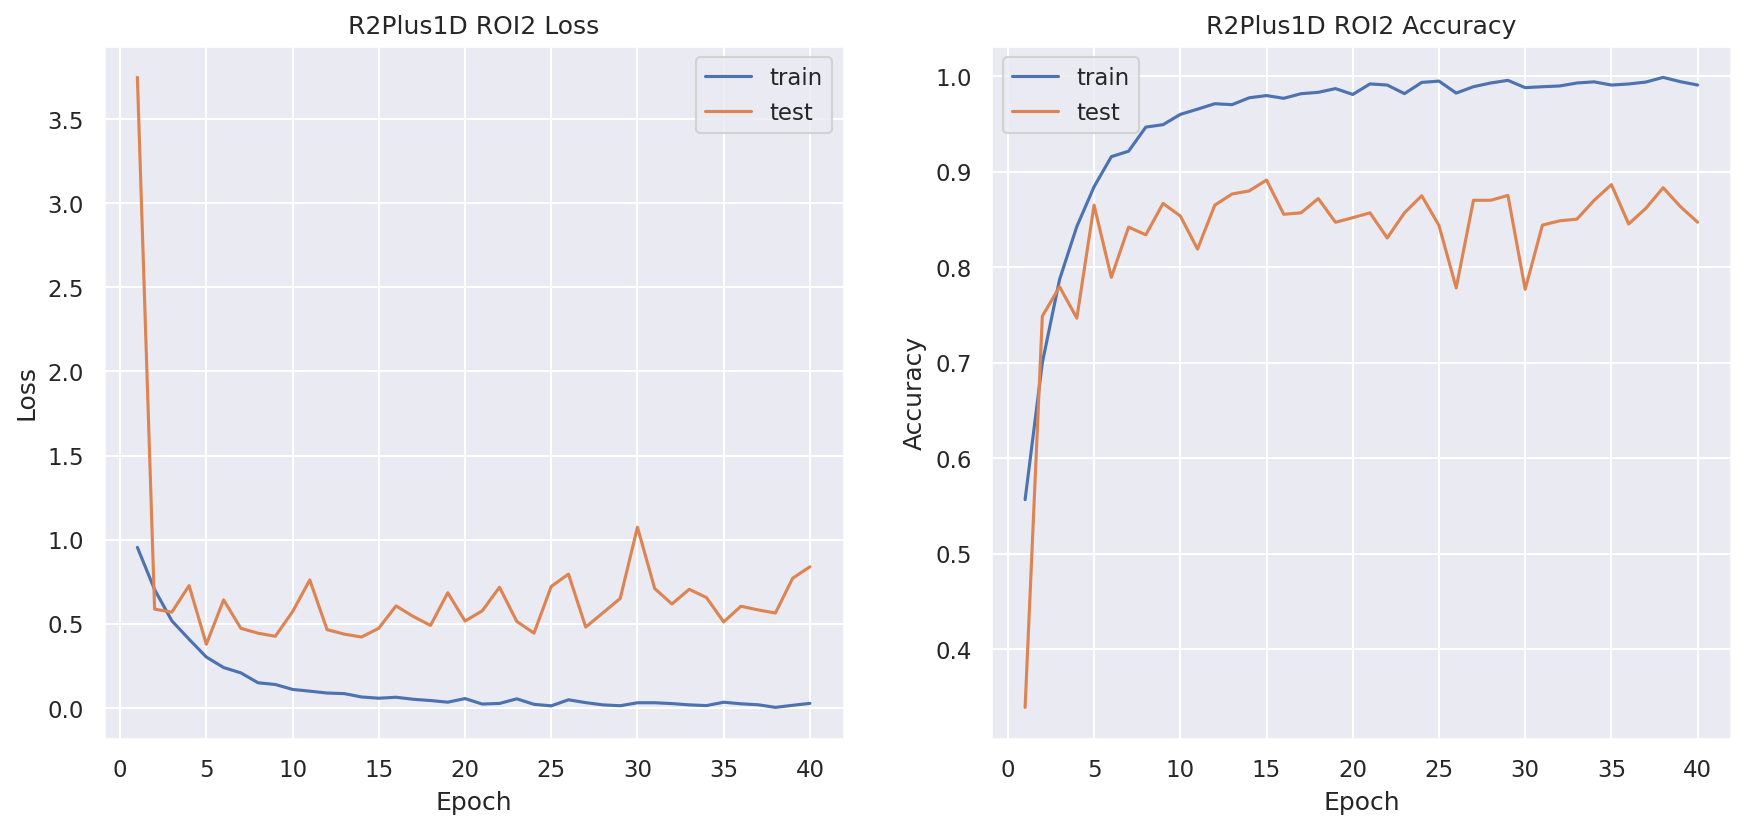

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'R2Plus1D ROI2')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = R2Plus1D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Accuracy: 0.8896321070234113
Precision: 0.8933021366312704
Recall: 0.8904712762297903


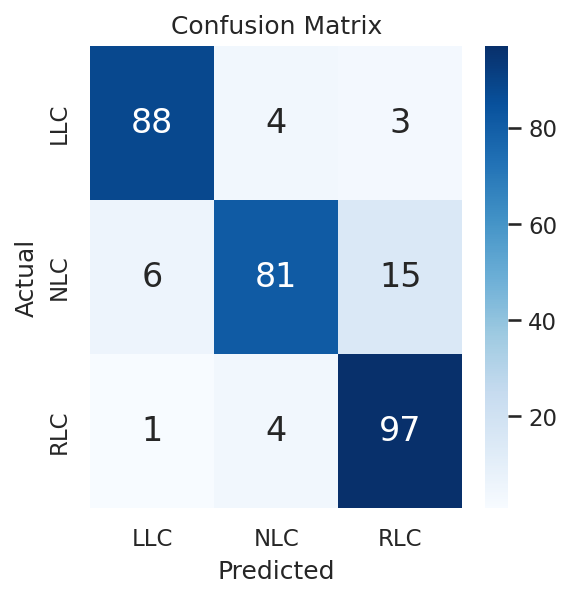

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

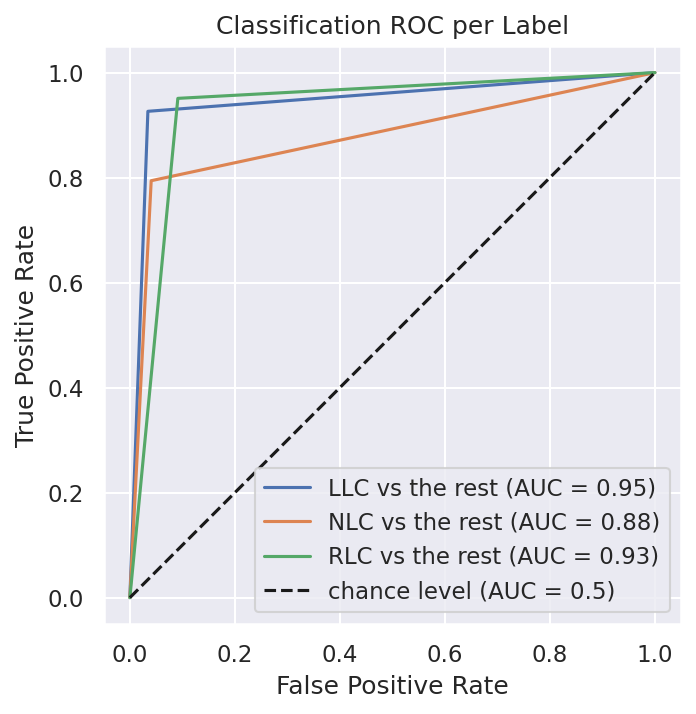

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

## **ROI 3:**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'R2Plus1D_ROI3_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = R2Plus1D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/319 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch [1/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.411, loss=1.1]


Epoch: 1 | train_loss: 1.1035 | train_acc: 0.4105 | test_loss: 0.9808 | test_acc: 0.4809


Epoch [2/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.484, loss=1.01]


Epoch: 2 | train_loss: 1.0122 | train_acc: 0.4839 | test_loss: 0.9802 | test_acc: 0.4871


Epoch [3/40]: 100%|██████████| 319/319 [05:02<00:00,  1.05it/s, acc=0.537, loss=0.953]


Epoch: 3 | train_loss: 0.9532 | train_acc: 0.5369 | test_loss: 0.9214 | test_acc: 0.5942


Epoch [4/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.643, loss=0.796]


Epoch: 4 | train_loss: 0.7962 | train_acc: 0.6425 | test_loss: 0.7424 | test_acc: 0.6830


Epoch [5/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.739, loss=0.614]


Epoch: 5 | train_loss: 0.6136 | train_acc: 0.7385 | test_loss: 1.1408 | test_acc: 0.5377


Epoch [6/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.789, loss=0.512]


Epoch: 6 | train_loss: 0.5117 | train_acc: 0.7891 | test_loss: 0.6628 | test_acc: 0.7356


Epoch [7/40]: 100%|██████████| 319/319 [05:08<00:00,  1.04it/s, acc=0.848, loss=0.39]


Epoch: 7 | train_loss: 0.3903 | train_acc: 0.8475 | test_loss: 0.6758 | test_acc: 0.7455


Epoch [8/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.87, loss=0.34]


Epoch: 8 | train_loss: 0.3400 | train_acc: 0.8695 | test_loss: 0.6073 | test_acc: 0.7916


Epoch [9/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.904, loss=0.258]


Epoch: 9 | train_loss: 0.2583 | train_acc: 0.9036 | test_loss: 0.6357 | test_acc: 0.7928


Epoch [10/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.922, loss=0.212]


Epoch: 10 | train_loss: 0.2123 | train_acc: 0.9216 | test_loss: 0.6574 | test_acc: 0.7996


Epoch [11/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.94, loss=0.167]


Epoch: 11 | train_loss: 0.1672 | train_acc: 0.9404 | test_loss: 0.5988 | test_acc: 0.8209


Epoch [12/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.948, loss=0.145]


Epoch: 12 | train_loss: 0.1451 | train_acc: 0.9479 | test_loss: 0.6982 | test_acc: 0.8224


Epoch [13/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.954, loss=0.127]


Epoch: 13 | train_loss: 0.1268 | train_acc: 0.9542 | test_loss: 0.5794 | test_acc: 0.8603


Epoch [14/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.967, loss=0.0968]


Epoch: 14 | train_loss: 0.0968 | train_acc: 0.9669 | test_loss: 0.7376 | test_acc: 0.8110


Epoch [15/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.971, loss=0.0872]


Epoch: 15 | train_loss: 0.0872 | train_acc: 0.9705 | test_loss: 1.0518 | test_acc: 0.7539


Epoch [16/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.969, loss=0.0864]


Epoch: 16 | train_loss: 0.0864 | train_acc: 0.9692 | test_loss: 0.6737 | test_acc: 0.8355


Epoch [17/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.973, loss=0.0735]


Epoch: 17 | train_loss: 0.0735 | train_acc: 0.9730 | test_loss: 0.7756 | test_acc: 0.8307


Epoch [18/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.972, loss=0.078]


Epoch: 18 | train_loss: 0.0780 | train_acc: 0.9720 | test_loss: 0.9408 | test_acc: 0.8047


Epoch [19/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.977, loss=0.0612]


Epoch: 19 | train_loss: 0.0612 | train_acc: 0.9769 | test_loss: 0.7918 | test_acc: 0.8421


Epoch [20/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.982, loss=0.0543]


Epoch: 20 | train_loss: 0.0543 | train_acc: 0.9822 | test_loss: 1.1708 | test_acc: 0.7635


Epoch [21/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.984, loss=0.0522]


Epoch: 21 | train_loss: 0.0522 | train_acc: 0.9843 | test_loss: 0.9447 | test_acc: 0.7996


Epoch [22/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.98, loss=0.0636]


Epoch: 22 | train_loss: 0.0636 | train_acc: 0.9798 | test_loss: 0.7557 | test_acc: 0.8487


Epoch [23/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.985, loss=0.04]


Epoch: 23 | train_loss: 0.0400 | train_acc: 0.9849 | test_loss: 0.7618 | test_acc: 0.8373


Epoch [24/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.986, loss=0.0421]


Epoch: 24 | train_loss: 0.0421 | train_acc: 0.9861 | test_loss: 0.9230 | test_acc: 0.8176


Epoch [25/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.985, loss=0.0425]


Epoch: 25 | train_loss: 0.0425 | train_acc: 0.9845 | test_loss: 0.9157 | test_acc: 0.8553


Epoch [26/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.985, loss=0.041]


Epoch: 26 | train_loss: 0.0410 | train_acc: 0.9847 | test_loss: 0.8277 | test_acc: 0.8553


Epoch [27/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.99, loss=0.0336]


Epoch: 27 | train_loss: 0.0336 | train_acc: 0.9902 | test_loss: 0.8046 | test_acc: 0.8077


Epoch [28/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.986, loss=0.041]


Epoch: 28 | train_loss: 0.0410 | train_acc: 0.9865 | test_loss: 0.7090 | test_acc: 0.8421


Epoch [29/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.992, loss=0.0253]


Epoch: 29 | train_loss: 0.0253 | train_acc: 0.9922 | test_loss: 0.8406 | test_acc: 0.8406


Epoch [30/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.986, loss=0.0366]


Epoch: 30 | train_loss: 0.0366 | train_acc: 0.9862 | test_loss: 0.7442 | test_acc: 0.8684


Epoch [31/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.984, loss=0.0431]


Epoch: 31 | train_loss: 0.0431 | train_acc: 0.9843 | test_loss: 0.8873 | test_acc: 0.8340


Epoch [32/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.996, loss=0.0128]


Epoch: 32 | train_loss: 0.0128 | train_acc: 0.9959 | test_loss: 0.9534 | test_acc: 0.8454


Epoch [33/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.991, loss=0.0354]


Epoch: 33 | train_loss: 0.0354 | train_acc: 0.9908 | test_loss: 0.8429 | test_acc: 0.8439


Epoch [34/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.996, loss=0.00996]


Epoch: 34 | train_loss: 0.0100 | train_acc: 0.9959 | test_loss: 0.8840 | test_acc: 0.8505


Epoch [35/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.996, loss=0.0154]


Epoch: 35 | train_loss: 0.0154 | train_acc: 0.9962 | test_loss: 1.6033 | test_acc: 0.7964


Epoch [36/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.983, loss=0.0508]


Epoch: 36 | train_loss: 0.0508 | train_acc: 0.9826 | test_loss: 0.7651 | test_acc: 0.8750


Epoch [37/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.993, loss=0.0204]


Epoch: 37 | train_loss: 0.0204 | train_acc: 0.9929 | test_loss: 0.9441 | test_acc: 0.8307


Epoch [38/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.995, loss=0.0207]


Epoch: 38 | train_loss: 0.0207 | train_acc: 0.9945 | test_loss: 0.9770 | test_acc: 0.8373


Epoch [39/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.996, loss=0.0111]


Epoch: 39 | train_loss: 0.0111 | train_acc: 0.9961 | test_loss: 1.0707 | test_acc: 0.8520


Epoch [40/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.991, loss=0.0276]


Epoch: 40 | train_loss: 0.0276 | train_acc: 0.9910 | test_loss: 1.0719 | test_acc: 0.8454
Total training time: 12799.306 seconds


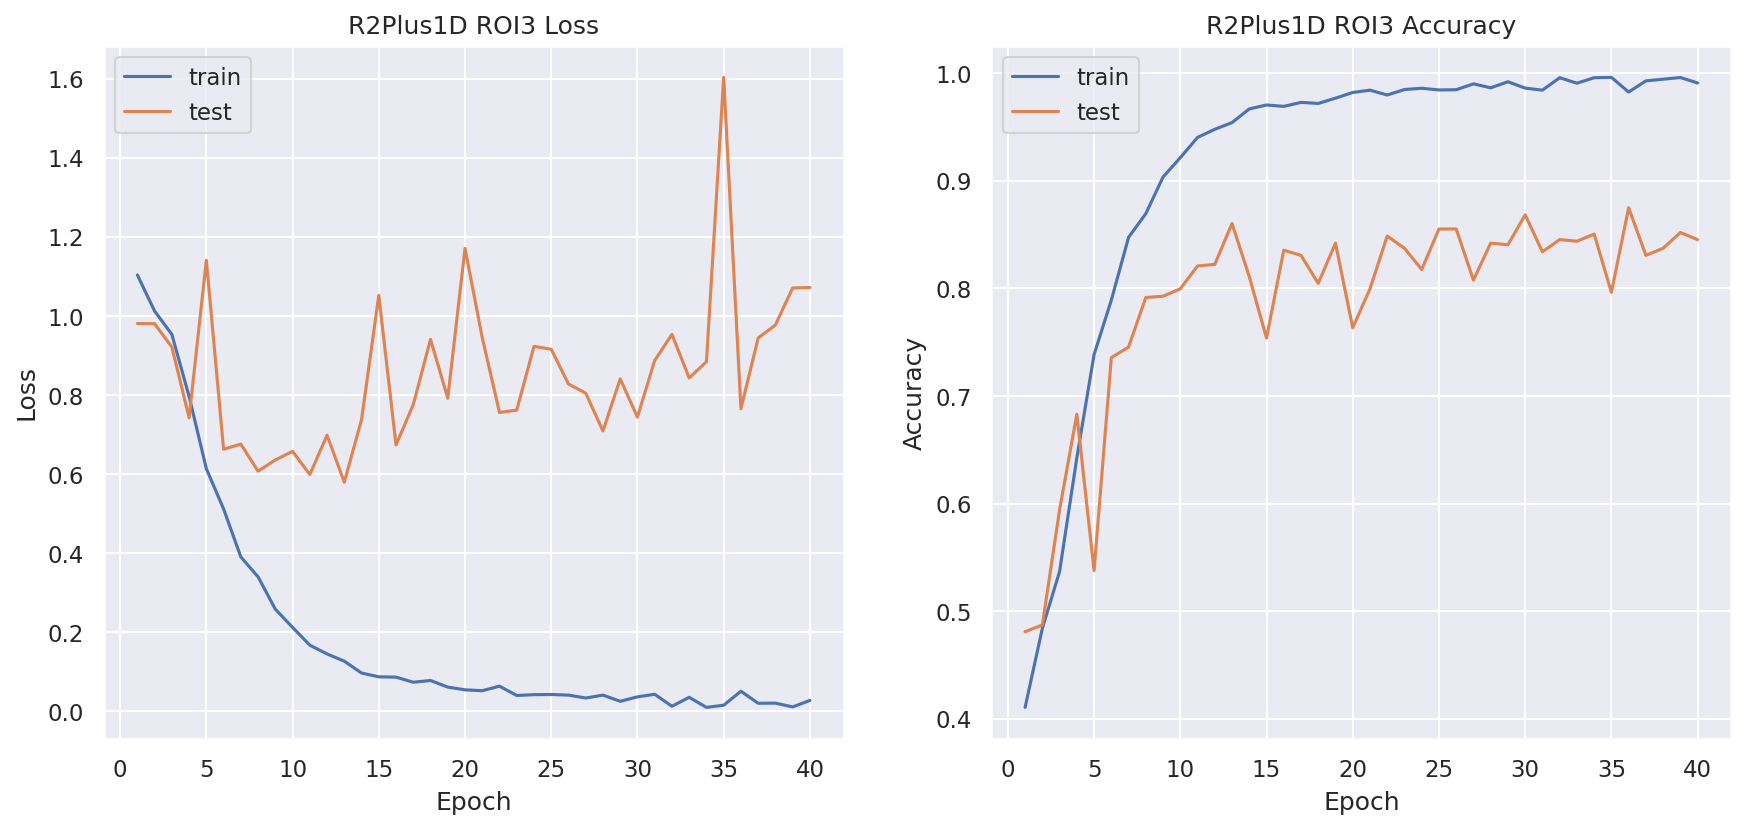

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'R2Plus1D ROI3')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = R2Plus1D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Accuracy: 0.8729096989966555
Precision: 0.8734002168740124
Recall: 0.8738906088751289


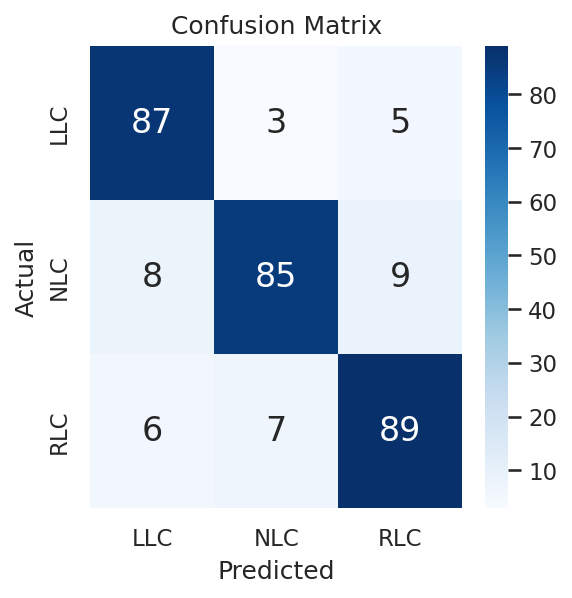

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

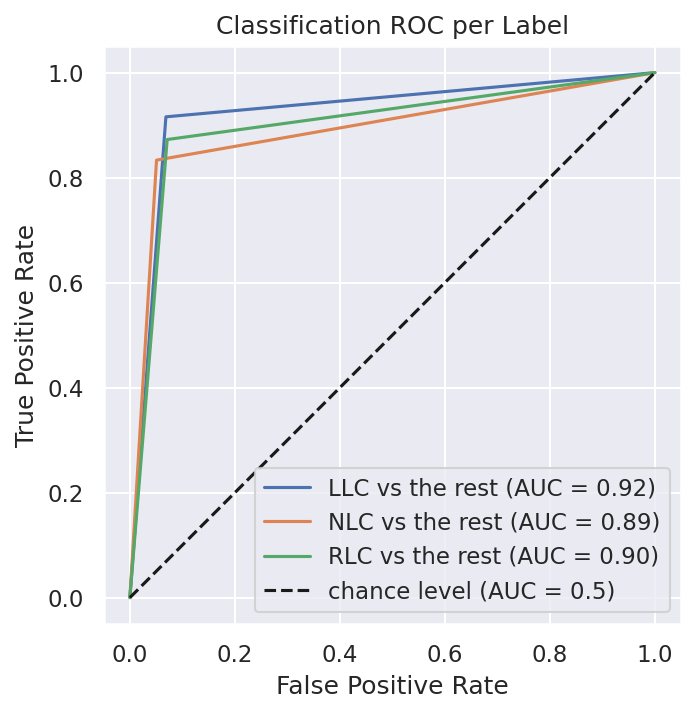

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

## **ROI 4:**

In [ ]:
transforms = [t.Resize((112,112), antialias=None)]
transformer = t.Compose(transforms)

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'R2Plus1D_ROI4_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = R2Plus1D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.465, loss=1.04]


Epoch: 1 | train_loss: 1.0403 | train_acc: 0.4654 | test_loss: 1.0399 | test_acc: 0.4686


Epoch [2/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.522, loss=0.968]


Epoch: 2 | train_loss: 0.9685 | train_acc: 0.5216 | test_loss: 0.9600 | test_acc: 0.5224


Epoch [3/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.562, loss=0.917]


Epoch: 3 | train_loss: 0.9174 | train_acc: 0.5620 | test_loss: 1.0363 | test_acc: 0.5200


Epoch [4/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.657, loss=0.783]


Epoch: 4 | train_loss: 0.7830 | train_acc: 0.6570 | test_loss: 1.2013 | test_acc: 0.5440


Epoch [5/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.735, loss=0.634]


Epoch: 5 | train_loss: 0.6340 | train_acc: 0.7348 | test_loss: 0.8232 | test_acc: 0.6869


Epoch [6/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.815, loss=0.472]


Epoch: 6 | train_loss: 0.4724 | train_acc: 0.8154 | test_loss: 0.7616 | test_acc: 0.7243


Epoch [7/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.857, loss=0.379]


Epoch: 7 | train_loss: 0.3793 | train_acc: 0.8574 | test_loss: 0.9382 | test_acc: 0.7243


Epoch [8/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.898, loss=0.288]


Epoch: 8 | train_loss: 0.2878 | train_acc: 0.8979 | test_loss: 0.8960 | test_acc: 0.6983


Epoch [9/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.919, loss=0.224]


Epoch: 9 | train_loss: 0.2240 | train_acc: 0.9191 | test_loss: 0.7773 | test_acc: 0.7458


Epoch [10/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.934, loss=0.189]


Epoch: 10 | train_loss: 0.1893 | train_acc: 0.9343 | test_loss: 0.9403 | test_acc: 0.7419


Epoch [11/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.945, loss=0.164]


Epoch: 11 | train_loss: 0.1640 | train_acc: 0.9450 | test_loss: 0.8711 | test_acc: 0.7751


Epoch [12/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.956, loss=0.127]


Epoch: 12 | train_loss: 0.1266 | train_acc: 0.9563 | test_loss: 0.9706 | test_acc: 0.7392


Epoch [13/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.949, loss=0.152]


Epoch: 13 | train_loss: 0.1519 | train_acc: 0.9487 | test_loss: 0.7062 | test_acc: 0.7736


Epoch [14/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.958, loss=0.114]


Epoch: 14 | train_loss: 0.1145 | train_acc: 0.9583 | test_loss: 0.7958 | test_acc: 0.7964


Epoch [15/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.966, loss=0.092]


Epoch: 15 | train_loss: 0.0920 | train_acc: 0.9661 | test_loss: 0.8787 | test_acc: 0.7569


Epoch [16/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.96, loss=0.115]


Epoch: 16 | train_loss: 0.1145 | train_acc: 0.9598 | test_loss: 0.9784 | test_acc: 0.7736


Epoch [17/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.976, loss=0.0698]


Epoch: 17 | train_loss: 0.0698 | train_acc: 0.9762 | test_loss: 0.9897 | test_acc: 0.7967


Epoch [18/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.975, loss=0.071]


Epoch: 18 | train_loss: 0.0710 | train_acc: 0.9749 | test_loss: 1.0709 | test_acc: 0.7880


Epoch [19/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.973, loss=0.0746]


Epoch: 19 | train_loss: 0.0746 | train_acc: 0.9735 | test_loss: 1.0334 | test_acc: 0.7356


Epoch [20/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.982, loss=0.0554]


Epoch: 20 | train_loss: 0.0554 | train_acc: 0.9816 | test_loss: 0.9080 | test_acc: 0.7751


Epoch [21/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.982, loss=0.0492]


Epoch: 21 | train_loss: 0.0492 | train_acc: 0.9824 | test_loss: 1.0274 | test_acc: 0.7623


Epoch [22/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.982, loss=0.0548]


Epoch: 22 | train_loss: 0.0548 | train_acc: 0.9824 | test_loss: 1.1405 | test_acc: 0.7656


Epoch [23/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.986, loss=0.0372]


Epoch: 23 | train_loss: 0.0372 | train_acc: 0.9865 | test_loss: 1.3231 | test_acc: 0.7554


Epoch [24/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.979, loss=0.0646]


Epoch: 24 | train_loss: 0.0646 | train_acc: 0.9790 | test_loss: 1.3817 | test_acc: 0.7440


Epoch [25/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.983, loss=0.0492]


Epoch: 25 | train_loss: 0.0492 | train_acc: 0.9833 | test_loss: 1.3223 | test_acc: 0.7673


Epoch [26/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.98, loss=0.0597]


Epoch: 26 | train_loss: 0.0597 | train_acc: 0.9798 | test_loss: 0.9830 | test_acc: 0.7934


Epoch [27/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.99, loss=0.0318]


Epoch: 27 | train_loss: 0.0318 | train_acc: 0.9904 | test_loss: 1.0091 | test_acc: 0.7883


Epoch [28/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.985, loss=0.0443]


Epoch: 28 | train_loss: 0.0443 | train_acc: 0.9850 | test_loss: 1.1511 | test_acc: 0.7572


Epoch [29/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.985, loss=0.0432]


Epoch: 29 | train_loss: 0.0432 | train_acc: 0.9852 | test_loss: 0.9277 | test_acc: 0.8032


Epoch [30/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.989, loss=0.0296]


Epoch: 30 | train_loss: 0.0296 | train_acc: 0.9894 | test_loss: 1.0526 | test_acc: 0.8032


Epoch [31/40]: 100%|██████████| 319/319 [05:02<00:00,  1.05it/s, acc=0.987, loss=0.036]


Epoch: 31 | train_loss: 0.0360 | train_acc: 0.9869 | test_loss: 0.8165 | test_acc: 0.8200


Epoch [32/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.987, loss=0.0397]


Epoch: 32 | train_loss: 0.0397 | train_acc: 0.9870 | test_loss: 1.2242 | test_acc: 0.7817


Epoch [33/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.986, loss=0.0405]


Epoch: 33 | train_loss: 0.0405 | train_acc: 0.9861 | test_loss: 0.9767 | test_acc: 0.7739


Epoch [34/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.993, loss=0.0217]


Epoch: 34 | train_loss: 0.0217 | train_acc: 0.9931 | test_loss: 1.2528 | test_acc: 0.7539


Epoch [35/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.995, loss=0.0175]


Epoch: 35 | train_loss: 0.0175 | train_acc: 0.9953 | test_loss: 1.2885 | test_acc: 0.7901


Epoch [36/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.994, loss=0.0222]


Epoch: 36 | train_loss: 0.0222 | train_acc: 0.9941 | test_loss: 1.7216 | test_acc: 0.7766


Epoch [37/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.986, loss=0.0423]


Epoch: 37 | train_loss: 0.0423 | train_acc: 0.9859 | test_loss: 1.1473 | test_acc: 0.7931


Epoch [38/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.982, loss=0.0577]


Epoch: 38 | train_loss: 0.0577 | train_acc: 0.9818 | test_loss: 0.9717 | test_acc: 0.8098


Epoch [39/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.992, loss=0.0249]


Epoch: 39 | train_loss: 0.0249 | train_acc: 0.9916 | test_loss: 1.1964 | test_acc: 0.7635


Epoch [40/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.993, loss=0.0207]


Epoch: 40 | train_loss: 0.0207 | train_acc: 0.9928 | test_loss: 1.3561 | test_acc: 0.7670
Total training time: 12578.363 seconds


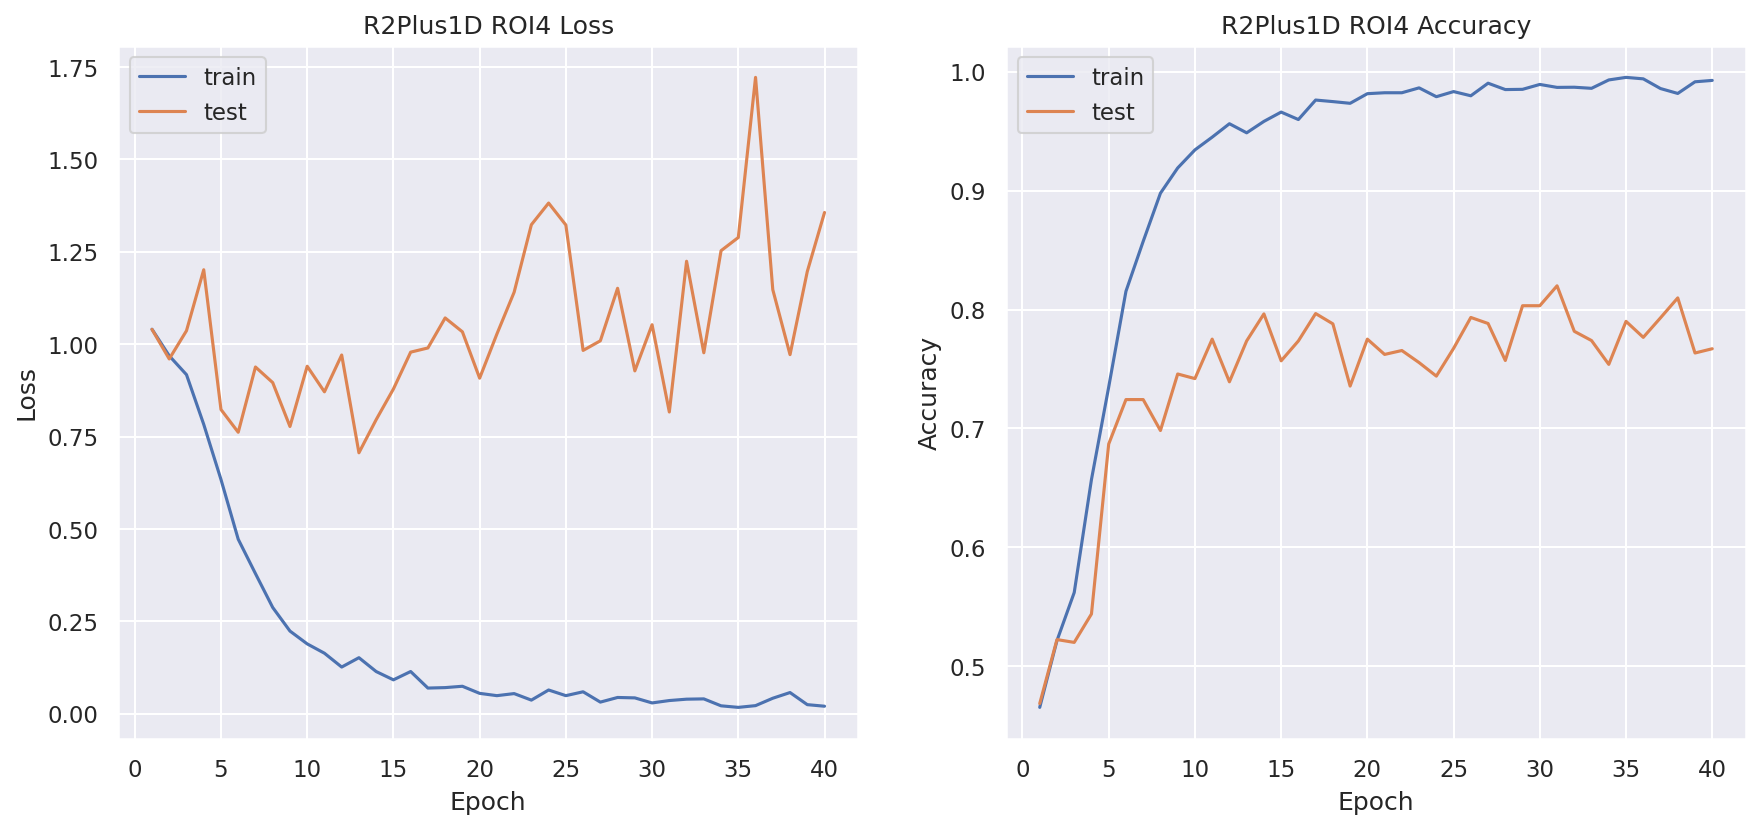

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'R2Plus1D ROI4')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = R2Plus1D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8260869565217391
Precision: 0.8305709437744442
Recall: 0.8264533883728932


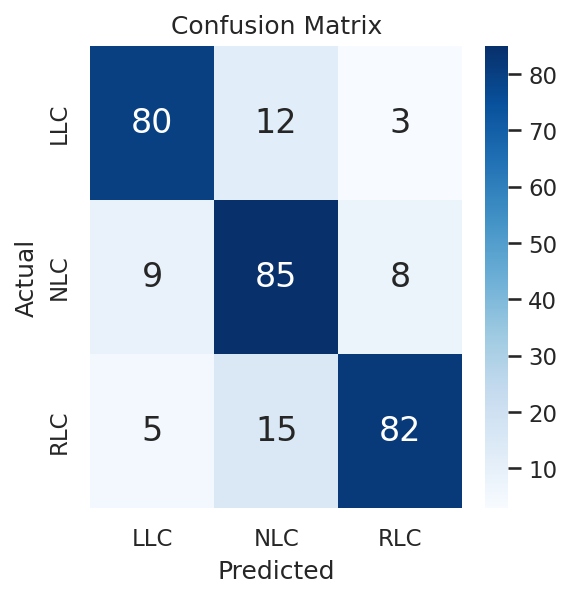

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

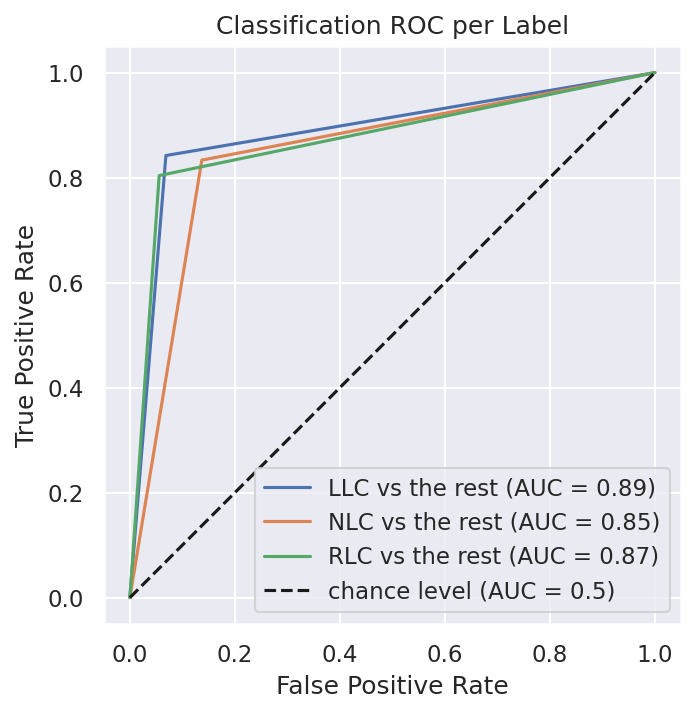

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

# **Prediction**

These experiments are for the lane change prediction task. Here we look at how the model performs on trying to predict the lane changes using the best ROI from the recognition experiments. All the models are again evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the same as above.

In [7]:
# setup videofolder to download the data with ROI x2
train_dir = './datasets/train/Prediction/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Prediction/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [8]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'R2Plus1D_ROI2_prediction')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = R2Plus1D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:23<00:00,  1.01s/it, acc=0.401, loss=1.11]


Epoch: 1 | train_loss: 1.1142 | train_acc: 0.4007 | test_loss: 1.0417 | test_acc: 0.4638


Epoch [2/40]: 100%|██████████| 319/319 [05:20<00:00,  1.01s/it, acc=0.466, loss=1.03]


Epoch: 2 | train_loss: 1.0309 | train_acc: 0.4662 | test_loss: 1.1431 | test_acc: 0.5117


Epoch [3/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.498, loss=0.984]


Epoch: 3 | train_loss: 0.9841 | train_acc: 0.4978 | test_loss: 0.9448 | test_acc: 0.5613


Epoch [4/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.561, loss=0.915]


Epoch: 4 | train_loss: 0.9148 | train_acc: 0.5609 | test_loss: 0.9141 | test_acc: 0.6059


Epoch [5/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.621, loss=0.831]


Epoch: 5 | train_loss: 0.8305 | train_acc: 0.6212 | test_loss: 0.9611 | test_acc: 0.5789


Epoch [6/40]: 100%|██████████| 319/319 [05:20<00:00,  1.01s/it, acc=0.665, loss=0.759]


Epoch: 6 | train_loss: 0.7586 | train_acc: 0.6651 | test_loss: 0.8571 | test_acc: 0.6304


Epoch [7/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.72, loss=0.66]


Epoch: 7 | train_loss: 0.6600 | train_acc: 0.7204 | test_loss: 1.0242 | test_acc: 0.5957


Epoch [8/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.754, loss=0.585]


Epoch: 8 | train_loss: 0.5855 | train_acc: 0.7540 | test_loss: 1.0145 | test_acc: 0.6370


Epoch [9/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.8, loss=0.499]


Epoch: 9 | train_loss: 0.4993 | train_acc: 0.8002 | test_loss: 1.0399 | test_acc: 0.5993


Epoch [10/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.837, loss=0.423]


Epoch: 10 | train_loss: 0.4229 | train_acc: 0.8372 | test_loss: 1.2484 | test_acc: 0.5975


Epoch [11/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.868, loss=0.36]


Epoch: 11 | train_loss: 0.3605 | train_acc: 0.8676 | test_loss: 1.2870 | test_acc: 0.5990


Epoch [12/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.889, loss=0.291]


Epoch: 12 | train_loss: 0.2911 | train_acc: 0.8889 | test_loss: 2.0232 | test_acc: 0.5580


Epoch [13/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.905, loss=0.256]


Epoch: 13 | train_loss: 0.2561 | train_acc: 0.9046 | test_loss: 1.5106 | test_acc: 0.6023


Epoch [14/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.923, loss=0.205]


Epoch: 14 | train_loss: 0.2053 | train_acc: 0.9232 | test_loss: 1.8219 | test_acc: 0.5795


Epoch [15/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.934, loss=0.181]


Epoch: 15 | train_loss: 0.1811 | train_acc: 0.9342 | test_loss: 1.7010 | test_acc: 0.5505


Epoch [16/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.95, loss=0.14]


Epoch: 16 | train_loss: 0.1403 | train_acc: 0.9502 | test_loss: 1.9294 | test_acc: 0.5813


Epoch [17/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.953, loss=0.135]


Epoch: 17 | train_loss: 0.1353 | train_acc: 0.9530 | test_loss: 2.0065 | test_acc: 0.5547


Epoch [18/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.966, loss=0.104]


Epoch: 18 | train_loss: 0.1041 | train_acc: 0.9657 | test_loss: 1.7485 | test_acc: 0.6136


Epoch [19/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.968, loss=0.0955]


Epoch: 19 | train_loss: 0.0955 | train_acc: 0.9677 | test_loss: 1.8969 | test_acc: 0.6139


Epoch [20/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.971, loss=0.0805]


Epoch: 20 | train_loss: 0.0805 | train_acc: 0.9709 | test_loss: 1.9197 | test_acc: 0.5909


Epoch [21/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.97, loss=0.0792]


Epoch: 21 | train_loss: 0.0792 | train_acc: 0.9704 | test_loss: 2.1524 | test_acc: 0.5876


Epoch [22/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.97, loss=0.0922]


Epoch: 22 | train_loss: 0.0922 | train_acc: 0.9702 | test_loss: 1.9464 | test_acc: 0.5679


Epoch [23/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.977, loss=0.068]


Epoch: 23 | train_loss: 0.0680 | train_acc: 0.9768 | test_loss: 2.0967 | test_acc: 0.5613


Epoch [24/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.975, loss=0.0695]


Epoch: 24 | train_loss: 0.0695 | train_acc: 0.9747 | test_loss: 2.4999 | test_acc: 0.5957


Epoch [25/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.978, loss=0.058]


Epoch: 25 | train_loss: 0.0580 | train_acc: 0.9783 | test_loss: 2.1953 | test_acc: 0.6041


Epoch [26/40]: 100%|██████████| 319/319 [05:11<00:00,  1.02it/s, acc=0.989, loss=0.0382]


Epoch: 26 | train_loss: 0.0382 | train_acc: 0.9890 | test_loss: 2.3101 | test_acc: 0.5778


Epoch [27/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.974, loss=0.0737]


Epoch: 27 | train_loss: 0.0737 | train_acc: 0.9736 | test_loss: 2.0696 | test_acc: 0.5745


Epoch [28/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.98, loss=0.0542]


Epoch: 28 | train_loss: 0.0542 | train_acc: 0.9800 | test_loss: 2.2193 | test_acc: 0.5942


Epoch [29/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.984, loss=0.048]


Epoch: 29 | train_loss: 0.0480 | train_acc: 0.9841 | test_loss: 2.2585 | test_acc: 0.6187


Epoch [30/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.981, loss=0.0553]


Epoch: 30 | train_loss: 0.0553 | train_acc: 0.9812 | test_loss: 2.3321 | test_acc: 0.5843


Epoch [31/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.992, loss=0.021]


Epoch: 31 | train_loss: 0.0210 | train_acc: 0.9921 | test_loss: 2.4481 | test_acc: 0.5876


Epoch [32/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.98, loss=0.06]


Epoch: 32 | train_loss: 0.0600 | train_acc: 0.9802 | test_loss: 2.5347 | test_acc: 0.5595


Epoch [33/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.976, loss=0.0635]


Epoch: 33 | train_loss: 0.0635 | train_acc: 0.9765 | test_loss: 2.1725 | test_acc: 0.5957


Epoch [34/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.985, loss=0.0431]


Epoch: 34 | train_loss: 0.0431 | train_acc: 0.9851 | test_loss: 2.8634 | test_acc: 0.5939


Epoch [35/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.989, loss=0.032]


Epoch: 35 | train_loss: 0.0320 | train_acc: 0.9886 | test_loss: 2.3896 | test_acc: 0.6089


Epoch [36/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.984, loss=0.043]


Epoch: 36 | train_loss: 0.0430 | train_acc: 0.9839 | test_loss: 2.4417 | test_acc: 0.5401


Epoch [37/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.995, loss=0.0135]


Epoch: 37 | train_loss: 0.0135 | train_acc: 0.9949 | test_loss: 2.3978 | test_acc: 0.6417


Epoch [38/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.984, loss=0.0499]


Epoch: 38 | train_loss: 0.0499 | train_acc: 0.9839 | test_loss: 2.3711 | test_acc: 0.6139


Epoch [39/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.991, loss=0.0301]


Epoch: 39 | train_loss: 0.0301 | train_acc: 0.9906 | test_loss: 3.1403 | test_acc: 0.5760


Epoch [40/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.986, loss=0.037]


Epoch: 40 | train_loss: 0.0370 | train_acc: 0.9860 | test_loss: 2.6185 | test_acc: 0.5876
Total training time: 13176.203 seconds


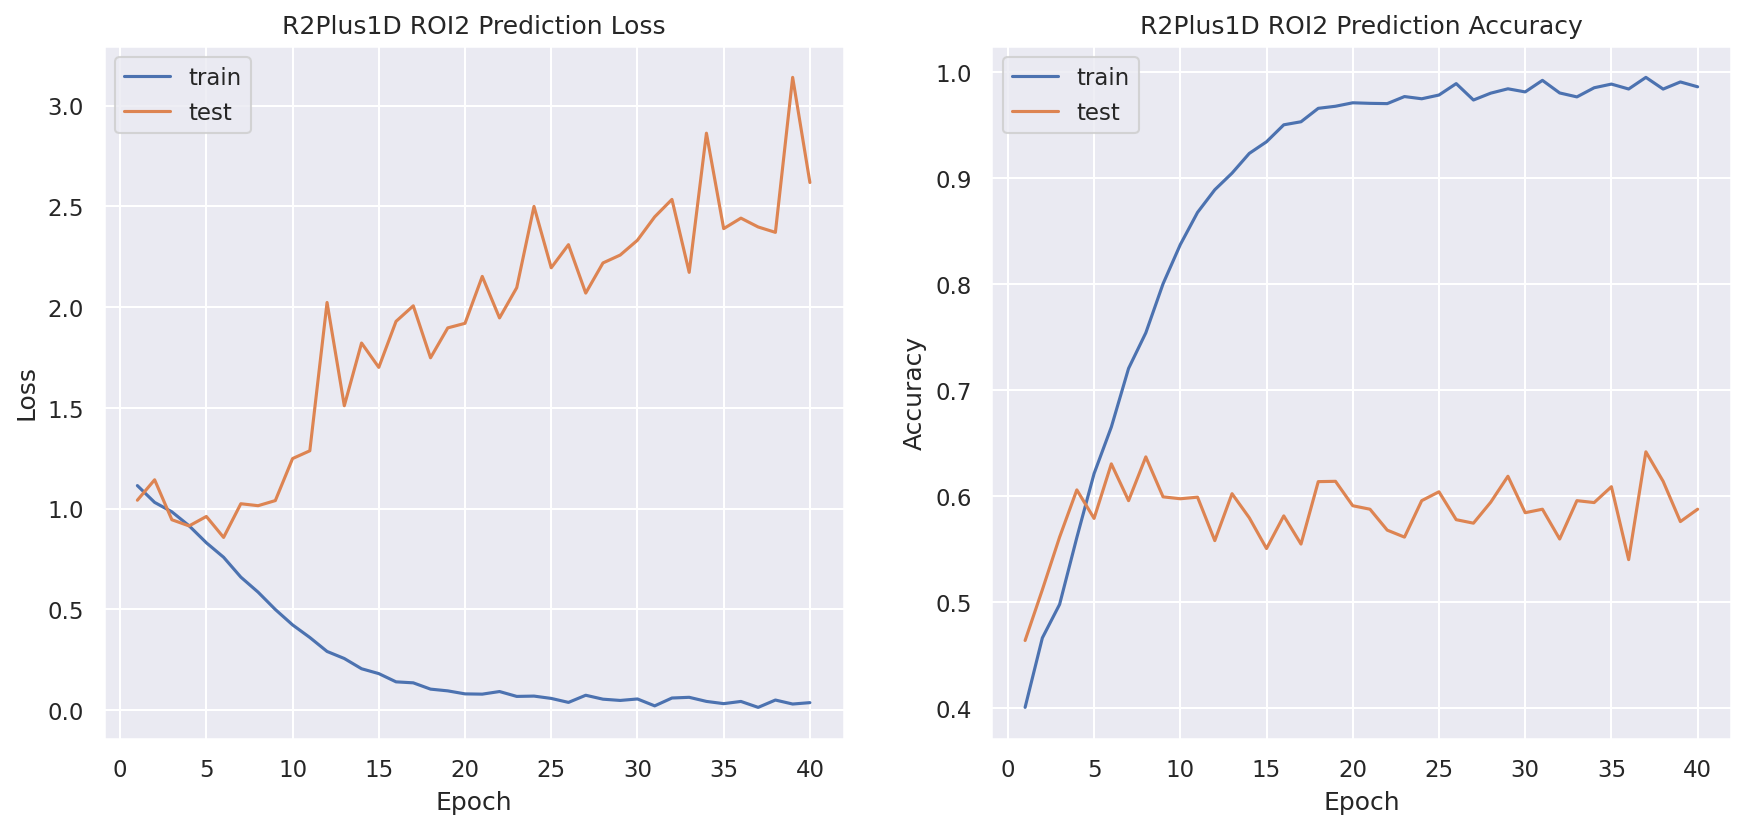

In [9]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'R2Plus1D ROI2 Prediction')

**Metrics:**

In [10]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = R2Plus1D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.6387959866220736
Precision: 0.6478344298245614
Recall: 0.6376676986584107


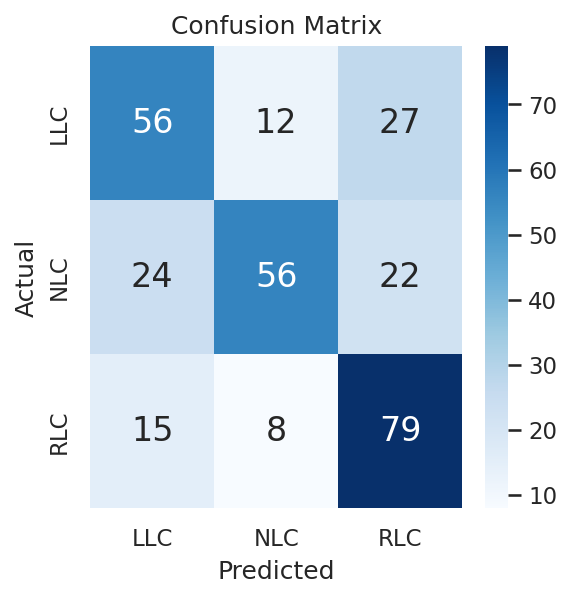

In [11]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

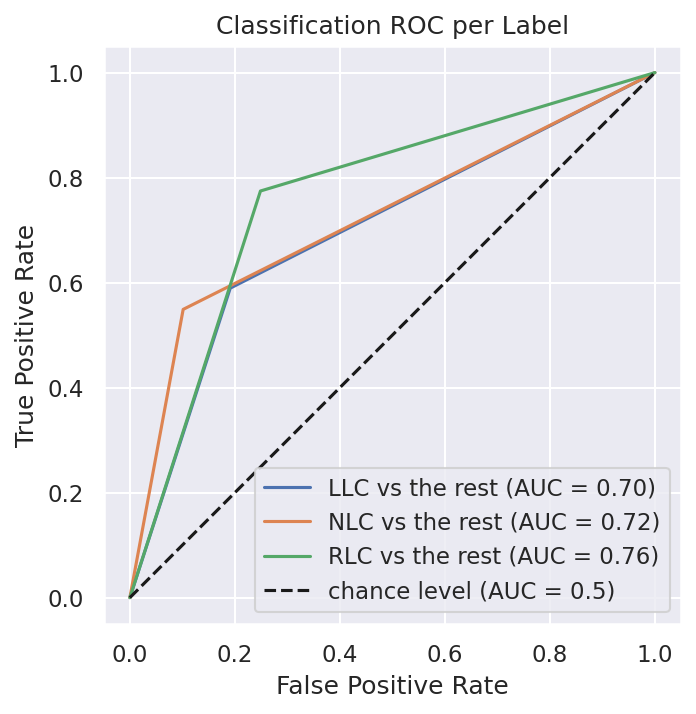

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()